## Imports

In [1]:
import os
import math

import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()

In [ ]:
# import mixtureofconcave as subm
# import determinantal as logsubm
# import plottingtools

## Plottingtools

In [8]:
#%% Plot gain curves

def objplot(objs, ground, setcolor, setcolorground=None):
    krange = np.arange(len(objs))
    
    plt.plot(krange, objs, "o", c=setcolor, label="f(S)")
    if setcolorground is not None:
        plt.plot(krange, [ground,]*len(objs), "--", c=setcolorground, label="ground set eval")
    plt.xlabel("set size")
    plt.legend(loc=2)

def logobjplot(objs, ground, setcolor, setcolorground=None):
    krange = np.arange(len(objs))
    
    plt.plot(krange, np.log(objs), "o", c=setcolor, label="log(f(S))")
    if setcolorground is not None:
        plt.plot(krange, [np.log(ground),]*len(objs), "--", c=setcolorground, label="ground set eval")
    plt.xlabel("set size")
    plt.legend(loc=2)


In [111]:
#%% Plot TSNE of subset selection

def viztsne(X, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.scatter(Xemb[:,0], Xemb[:,1], c="lightskyblue")
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot TSNE of subset selection -- with Discrete Memberships

def viztsne_DMQ(X, Memvec, memcolors, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    for jj in range(p):
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot TSNE of subset selection -- with Intersecting Memberships

def viztsne_IMQ(X, Memvec, memcolors, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.figure(figsize=(p*5, 5))
    for jj in range(p):
        plt.subplot(1,p,jj+1)
        plt.scatter(Xemb[:,0], Xemb[:,1], c=memcolors[0])
        
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[1], label="group{}".format(jj+1))
        
        plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
        plt.legend()


In [10]:
#%% Plot PCA reduction of subset selection

def vizpca(X, S, setcolor, setlabel):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d PCA
    """
    
    [n,m] = X.shape
    
    Xemb = PCA(n_components=m).fit(X).transform(X)[:,:2]
    
    plt.scatter(Xemb[:,0], Xemb[:,1], c="lightskyblue")
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()

#%% Plot PCA reduction of subset selection -- with Discrete Memberships

def vizpca_DMQ(X, Memvec, memcolors, S, setcolor, setlabel):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d PCA
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = PCA(n_components=m).fit(X).transform(X)[:,:2]
    
    for jj in range(p):
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()


In [ ]:
#%% Plot TSNE of subset selection -- with Feature Quotas

#


In [11]:
#%% Plot Group Membership histograms of selections -- Membership Quota

def vizbalance_MQ(V=None, Memvec, memcolors, S, setcolor, setlabel="selection"):
    """ Given a ground set (n)
        With Membership Assignments (n x p)
        A selection of indices S of size k < n
        Plot the selection's 2d PCA
    """
    
    [n,m] = Memvec.shape
    p = Memvec.shape[1]
    
    Xemb = PCA(n_components=m).fit(X).transform(X)[:,:2]
    
    for jj in range(p):
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
    plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
    plt.legend()


---

## Log-submodular

### DPP

In [ ]:
#%% Marginal gain oracle of the utility

def dppgains(K, AA, aa, detKA):
    """ Returns det(K_{A+a}) - det(K_A)
        BEING EXTREMELY CRUDE HERE,
        A more efficient way might be possible
    """
    
    Aa = np.append(AA,aa)
    KAa = np.atleast_2d(K[Aa])[:,Aa]
    
    return np.linalg.det(KAa) - detKA


In [ ]:
#%% Plain old simple Greedy

def greedygains_logsubmod(V, X, k):
    """ For a given ground set, a feature matrix whose determinant defines the objective
        (THIS IS FOR A DPP),
        Returns the greedy selection and step-wise objective values
        Over the addition of k items
    """
    
    K = X @ X.transpose()
    n = K.shape[0]
    
    if V == None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    ff = 1 # since this is a determinantal process and det(\phi) = 1
    objs[0] = ff
    
    for ii in range(k):
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = dppgains(K, A, V[vidx], ff)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
    
    return A, objs


### Run

In [ ]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))

K = X @ X.transpose()
ground = np.linalg.det(K)

In [ ]:
S, objectives = greedygains_logsubmod(None, X, k)

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
objplot(objectives, ground, "mediumvioletred")
plt.subplot(1,2,2)
logobjplot(objectives, ground, "purple", "midnightblue")

In [ ]:
for oo in objectives: print("{:.3f}".format(oo))

---

## Submodular

### A weighted mixture of m(A)^{0.2}

In [2]:
#%% Marginal gain oracle of the utility

def submodgains(X, modA, fA, aa, mixw):
    """ Returns f(A+a) - f(A)
        Where f(A) = \sum_{j=1}^m (w_j * \phi(\sum_{i \in A} X_{ij}))
    """
    
    modAa = modA + X[aa,:] if aa is not None else modA
    
    # options: modA**0.5, np.log(1+modA), (1-np.exp(-modA)), modA/(1+modA)
    fAa = np.dot(mixw, modAa**0.2)
    
    return fAa - fA


In [3]:
#%% Plain old simple Greedy

def greedygains_submod(V, X, mixw, k):
    """ For a given ground set, a feature matrix and mixture weights which define the objective
        (submodular),
        Returns the greedy selection and step-wise objective values
        Over the addition of k items
    """
    
    [n,m] = X.shape
    
    if V == None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    modA = np.sum(X[A,:], axis=0)
    ff = 0 # assume normalized for now
    objs[0] = ff
    
    for ii in range(k):
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = submodgains(X, modA, ff, V[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
    
    return A, objs


In [4]:
#%% Greedy for DMQ

def greedyquota_submod(V, X, mixw, Memvec, quo, k):
    """ For the disjoint membership quota.
        Memvec is an n x p one-hot matrix (exactly one 1 per row).
        quo is a p x 1 vector.
        Output a subset that satisfies the quotas.
    """
    
    [n,m] = X.shape
    
    if V == None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    modA = np.sum(X[A,:], axis=0)
    ff = 0 # assume normalized for now
    objs[0] = ff
    
    """ Quota-filling stage """
    
    ii = 0
    Vsat = np.copy(V) # only for use in the quota-filling stage
    while ii < np.sum(quo):
        
        maxgain = -100
        greedyv = np.random.choice(Vsat)
        
        for vidx in range(len(Vsat)):
            gain = submodgains(X, modA, ff, Vsat[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = Vsat[vidx]
        
        # add element to A, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        ff += maxgain
        objs[ii+1] = ff
        
        # remove from V, remove all from Vsat if quota filled
        V = V[V!=greedyv]
        grp = np.argwhere(Memvec[greedyv])
        if np.sum(Memvec[A,grp]) >= quo[grp]:
            Vsat = np.delete(V, np.argwhere(Memvec[:,grp]))
        
        ii += 1
    
    
    """ Regular greedy stage """
    
    while ii < k:
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = submodgains(X, modA, ff, V[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
        
        ii += 1
    
    return A, objs


### Run

In [ ]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

ground = np.dot(mixw, np.sum(X, axis=0)**0.2)

In [ ]:
S, objectives = greedygains_submod(None, X, mixw, k)

In [ ]:
plt.figure(figsize=(5,5))
objplot(objectives, ground, "seagreen", "darkolivegreen")

In [ ]:
for oo in objectives: print("{:.3f}".format(oo))

---

## DPP v/s Submodular

In [ ]:
n = 500
m = 72
k = 25

np.random.seed(0)
X = np.random.random((n, m))

np.random.seed(1)
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

In [ ]:
S_d, objectives_d = greedygains_logsubmod(None, X, k)

In [ ]:
S_s, objectives_s = greedygains_submod(None, X, mixw, k)

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
viztsne(X, S_d, "purple", "DPP", 30)
plt.subplot(1,2,2)
viztsne(X, S_s, "seagreen", "SPP", 30)

---

## Greedy v/s WeightedGreedy

Compare:<br>
Feasibility, output quality, computational complexity.

---

<p style="background-color:#ff9933">
Constrained Submodular Max with Discrete Membership Quota
</p>

colors -- #ccff66 #ff99cc #ff9933

Things to look out for:<br>
1. More number of groups <--> more constraint on maximizing w.r.t. one group
2. Having the groups correlating with features <--> making some group sinherently _better_ <--> making the quotas output worser solutions maybe.
3. Try with the _learnt_ ILMSF weights.. that way you have a "true" submodular mixture utility. You could also use true labels!!
4. Alternatively, "assign" groups via clustering.

In [ ]:
n_samples = 200
m_features = 2
k_budget = 80

np.random.seed(0)
X = np.random.random((n_samples, m_features))

np.random.seed(1)
mixw = np.random.random(m_features); mixw = mixw/np.max(mixw)

In [ ]:
p_groups = 10
memcolors = np.array(["#11{:02X}dd".format(pp) for pp in np.arange(0, 256, 256//p_groups)])

quo = np.ones(p_groups)*2

Random group assignment

In [ ]:
np.random.seed(2)
Memvec = np.eye(p_groups)[np.random.choice(p_groups, n_samples)]

print([len(np.argwhere(Memvec[:,jj])) for jj in range(p_groups)])

Clustering-based group assignment

In [ ]:
kmeans = KMeans(n_clusters=p_groups, random_state=0).fit(X)
Memvec = np.eye(p_groups)[kmeans.labels_]

vizpca_DMQ(X, Memvec, memcolors, [], "orange", "Group assignment", 30)

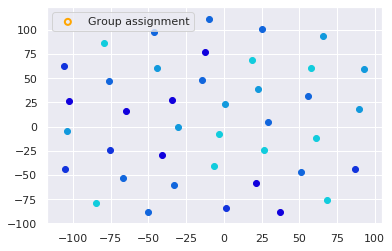

In [14]:
n_samples = 40
m_features = 2
k_budget = 15

np.random.seed(0)
X = np.random.random((n_samples, m_features))

np.random.seed(1)
mixw = np.random.random(m_features); mixw = mixw/np.max(mixw)

p_groups = 5
memcolors = np.array(["#11{:02X}dd".format(pp) for pp in np.arange(0, 256, 256//p_groups)])
quo = np.ones(p_groups)*2

np.random.seed(2)
Memvec = np.eye(p_groups)[np.random.choice(p_groups, n_samples)]
viztsne_DMQ(X, Memvec, memcolors, [], "orange", "Group assignment", 30)

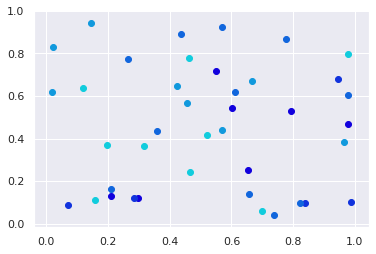

In [15]:
Xemb = X.copy()
for jj in range(p_groups):
    memgrp = np.argwhere(Memvec[:,jj])
    plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[jj])
#plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)

In [107]:
def greedyquota_submod(V, X, mixw, Memvec, quo, k ,verbose=False):
    """ For the disjoint membership quota.
        Memvec is an n x p one-hot matrix (exactly one 1 per row).
        quo is a p x 1 vector.
        Output a subset that satisfies the quotas.
    """
    
    [n,m] = X.shape
    
    if V == None:
        V = np.arange(n)
    
    objs = np.empty(k+1)
    
    A = np.empty(0, int)
    modA = np.sum(X[A,:], axis=0)
    ff = 0 # assume normalized for now
    objs[0] = ff
    
    """ Quota-filling stage """
    
    ii = 0
    Vsat = np.copy(V) # only for use in the quota-filling stage
    while ii < np.sum(quo):
        
        maxgain = -100
        greedyv = np.random.choice(Vsat)
        
        for vidx in range(len(Vsat)):
            gain = submodgains(X, modA, ff, Vsat[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = Vsat[vidx]
        
        # add element to A, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        ff += maxgain
        objs[ii+1] = ff
        
        # remove from V, remove all from Vsat if quota filled
        V = V[V!=greedyv]
        grp = np.argwhere(Memvec[greedyv])

        if verbose:
            print("selected element", greedyv)
            print("lies in group", grp)
            print("new A", A)

        if np.sum(Memvec[A,grp]) >= quo[grp]:
            if verbose:
                print("Quota for group {} satisfied by set {}".format(grp, A[Memvec[A,grp].flatten().astype(bool)]))
                print("Deleting {}".format(Vsat[Memvec[Vsat,grp].flatten().astype(bool)]))
            Vsat = np.delete(Vsat, np.argwhere(Memvec[Vsat,grp].flatten()))
        else:
            if verbose:
                print("Only deleting", Vsat[Vsat==greedyv])
            Vsat = Vsat[Vsat!=greedyv]

        if verbose:
            print("new Vsat", Vsat)
        
        ii += 1
    
    
    """ Regular greedy stage """
    
    while ii < k:
        
        maxgain = -100
        greedyv = np.random.choice(V)
        
        for vidx in range(len(V)):
            gain = submodgains(X, modA, ff, V[vidx], mixw)
            if gain > maxgain:
                maxgain = gain
                greedyv = V[vidx]
        
        # add element to A, remove from V, update gains
        A = np.append(A, greedyv)
        modA += X[greedyv,:]
        V = V[V!=greedyv]
        ff += maxgain
        objs[ii+1] = ff
        
        if verbose:
            print("selected element", greedyv)
            print("lies in group", np.argwhere(Memvec[greedyv]))
            print("new A", A)
        
        ii += 1
    
    return A, objs

In [108]:
greedyquota_submod(None, X, mixw, Memvec, quo, k_budget, True)

selected element 10
lies in group [[4]]
new A [10]
Only deleting [10]
new Vsat [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
selected element 9
lies in group [[2]]
new A [10  9]
Only deleting [9]
new Vsat [ 0  1  2  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
selected element 6
lies in group [[2]]
new A [10  9  6]
Quota for group [[2]] satisfied by set [9 6]
Deleting [ 3  6 15 18 20 27 31 33 36 37]
new Vsat [ 0  1  2  4  5  7  8 11 12 13 14 16 17 19 21 22 23 24 25 26 28 29 30 32
 34 35 38 39]
selected element 19
lies in group [[1]]
new A [10  9  6 19]
Only deleting [19]
new Vsat [ 0  1  2  4  5  7  8 11 12 13 14 16 17 21 22 23 24 25 26 28 29 30 32 34
 35 38 39]
selected element 22
lies in group [[3]]
new A [10  9  6 19 22]
Only deleting [22]
new Vsat [ 0  1  2  4  5  7  8 11 12 13 14 16 17 21 23 24 25 26 28 29 30 32 34 35
 38 39]
selected element 11
li

(array([10,  9,  6, 19, 22, 11, 35,  0, 13, 26, 36,  3,  5, 18,  4]),
 array([0.        , 1.53259038, 1.75589748, 1.89543965, 2.0015707 ,
        2.07743255, 2.14286593, 2.20076382, 2.25300434, 2.29990138,
        2.32969935, 2.37696241, 2.42011726, 2.45483674, 2.48722179,
        2.51679088]))

In [110]:
S_s, objectives_s = greedygains_submod(None, X, mixw, k_budget)
S_sq, objectives_sq = greedyquota_submod(None, X, mixw, Memvec, quo, k_budget)
S_r = np.random.choice(n_samples, k_budget)
objective_sr = submodgains(X, np.sum(X[S_r,:], axis=0), 0, None, mixw)

print("Objective without quota", objectives_s[-1], "\n", S_s)
print("Objective with quota", objectives_sq[-1], "\n", S_sq)
print("Objective of random selection", objective_sr, "\n", S_r)

Objective without quota 2.524768802746858 
 [10  9  6 19 36  3 22 11 35  0 13  5 18  4 15]
Objective with quota 2.5167908759785735 
 [10  9  6 19 22 11 35  0 13 26 36  3  5 18  4]
Objective of random selection 2.4190960662749688 
 [31 17 25  9  0  8 10  8 37 35 35 14 15  6 33]


In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# plottingtools.viztsne(X, S_s, "darkolivegreen", "SPP", 30)
vizpca(X, S_s, "darkolivegreen", "SPP", 30)
plt.subplot(1,2,2)
# plottingtools.viztsne_DMQ(X, Memvec, memcolors, S_sq, "orange", "SPP-DMQ", 30)
vizpca_DMQ(X, Memvec, memcolors, S_sq, "orange", "SPP-DMQ", 30)

In [ ]:
Memvec[S_sq]

In [ ]:
viztsne_IMQ(X, Memvec, ["lightskyblue", "darkcyan"], 3, S_sq, "orange", "SPP-DMQ", 30)

---

In [ ]:
print(objectives_s)
print(objectives_sq)

In [ ]:
def viztsne_IMQ(X, Memvec, memcolors, figrows, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.figure(figsize=((p//figrows+1)*5, figrows*5))
    for jj in range(p):
        plt.subplot(figrows,p//figrows+1,jj+1)
        plt.scatter(Xemb[:,0], Xemb[:,1], c=memcolors[0])
        
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[1], label="group{}".format(jj+1))
        
        plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
        plt.legend()